In [52]:
import scanpy as sc
import matplotlib.pyplot as plt

def dotplot_corr_expr(results, top_n=30):
    """
    Dotplot of genes ranked by correlation with C4b.
    Dot size = mean expression, Dot color = correlation with C4b.
    """
    df = results.sort_values("corr_with_C4b", ascending=False).head(top_n)

    plt.figure(figsize=(8, 0.4*top_n))
    sc = plt.scatter(
        x=df["corr_with_C4b"],
        y=df["gene"],
        s=df["mean_expression"]*20,   # scale size by mean expression
        c=df["corr_with_C4b"],
        cmap="Reds",
        alpha=0.8,
        edgecolor="k"
    )

    plt.xlabel("Correlation with C4b")
    plt.ylabel("Gene")
    plt.colorbar(sc, label="Correlation")
    plt.title("Top C4b co-expressed genes in DA-oligodendrocytes\n(size = mean expression)")

    # --- add size legend, positioned outside ---
    sizes = [df["mean_expression"].min(), df["mean_expression"].median(), df["mean_expression"].max()]
    labels = [f"{s:.2f}" for s in sizes]
    handles = [plt.scatter([], [], s=s*20, color="gray", alpha=0.6, edgecolor="k") for s in sizes]

    plt.legend(
        handles, labels, title="Mean expression",
        bbox_to_anchor=(1.3, 1), loc="upper left", frameon=True
    )

    plt.tight_layout()
    plt.show()


In [32]:
ad = sc.read_h5ad('../data/falcao_et_al_2018.h5ad')

In [33]:
ad.obs

,Group,MouseModel,Strain,Plate,total_counts,log10_total_counts,total_features,log10_total_features,pct_dropout,exprs_feature_controls_MySpikes,...,log10_counts_feature_controls_MyMit,log10_counts_feature_controls,log10_counts_endogenous_features,outlier,size_factor,Clusters,Renamed_clusternames,OldClusters,ReorderedViolin,L1Clusters
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
counts_290.tab.A2,Ctrl,Pdgfra-Cre,Black6,SS2-16-290,302386,5.480562,5886,3.769820,75.892930,182.569296,...,3.031812,3.137987,5.478587,False,0.614414,OPC.cluster1_Neu4_Igsf21_Ptprz1_1,COP,COP,COP,1
counts_290.tab.A3,Ctrl,Pdgfra-Cre,Black6,SS2-16-290,361622,5.558255,4746,3.676328,80.563014,167.475560,...,3.055760,3.100715,5.556740,False,0.955080,OPC.cluster1_Neu4_Igsf21_Ptprz1_1,COP,COP,COP,1
counts_290.tab.A6,Ctrl,Pdgfra-Cre,Black6,SS2-16-290,269738,5.430942,4650,3.667453,80.925067,179.367460,...,3.016616,3.112940,5.428852,False,0.993136,OPC.cluster1_Neu4_Igsf21_Ptprz1_1,COP,COP,COP,1
counts_290.tab.A4,Ctrl,Pdgfra-Cre,Black6,SS2-16-290,291815,5.465108,4568,3.659726,81.303393,157.576110,...,3.270213,3.311754,5.462049,False,1.408404,OPC.cluster1_Neu4_Igsf21_Ptprz1_2,OPC1,OPC1,OPC1,1
counts_290.tab.A5,Ctrl,Pdgfra-Cre,Black6,SS2-16-290,360293,5.556656,4883,3.688687,80.013831,174.150001,...,2.951338,3.054230,5.555290,False,1.215462,OPC.cluster1_Neu4_Igsf21_Ptprz1_2,OPC1,OPC1,OPC1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
counts_295.tab.P18,Ctrl,Pdgfra-GFP,Black6,SS2-16-295,438935,5.642400,3420,3.534026,85.989749,176.586088,...,3.141763,3.246252,5.640654,False,0.175533,MOL.cluster2_Ppp1r14a_Tmem151a_Gpr37_2,MOL5_6_Cntrl_B,MOL5_6_Cntrl_B,MOL5_6_Cntrl_B,2
counts_295.tab.P16,Ctrl,Pdgfra-GFP,Black6,SS2-16-295,522507,5.718092,3949,3.596487,83.805223,177.997707,...,3.262688,3.390759,5.716045,False,1.420141,MOL.cluster2_Ppp1r14a_Tmem151a_Gpr37_2,MOL5_6_Cntrl_B,MOL5_6_Cntrl_B,MOL5_6_Cntrl_B,2
counts_295.tab.P20,Ctrl,Pdgfra-GFP,Black6,SS2-16-295,505833,5.704007,3704,3.568671,84.822228,173.995651,...,3.060698,3.303196,5.702280,False,0.505785,MOL.cluster2_Ppp1r14a_Tmem151a_Gpr37_2,MOL5_6_Cntrl_A,MOL5_6_Cntrl_B,MOL5_6_Cntrl_A,2


         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


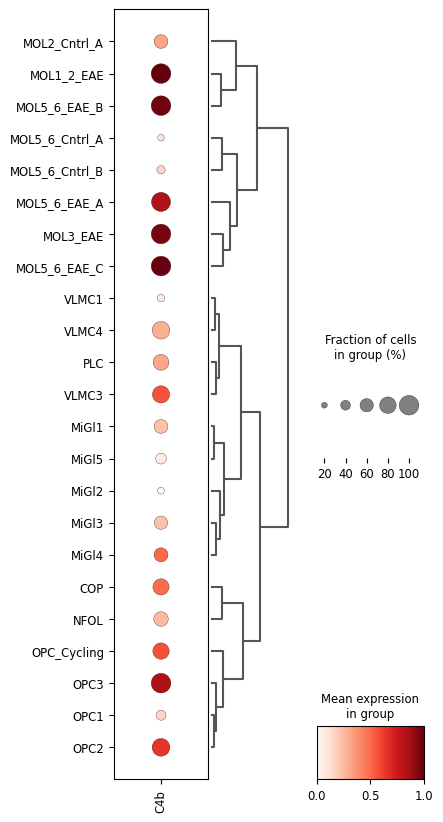

In [34]:
 sc.pl.dotplot(
        ad,
        var_names='C4b',
        groupby="Renamed_clusternames",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        dendrogram=True,
        figsize=(4, 10)
    )

In [35]:
import numpy as np
import pandas as pd

# Subset to DA-oligos only
da_oligos = ad[ad.obs["Renamed_clusternames"].str.contains('EAE'), :]

# Extract C4b expression vector
c4b_idx = da_oligos.var_names.get_loc("C4b")
c4b_expr = da_oligos.X[:, c4b_idx].toarray().ravel() if hasattr(da_oligos.X, "toarray") else da_oligos.X[:, c4b_idx].ravel()

# Convert X to dense DataFrame
X = da_oligos.to_df()

# Compute correlations with C4b
cors = X.corrwith(pd.Series(c4b_expr, index=X.index))

# Compute mean expression per gene
means = X.mean()

# Build combined DataFrame
results = pd.DataFrame({
    "gene": cors.index,
    "corr_with_C4b": cors.values,
    "mean_expression": means.values
})

# Sort by correlation
results = results.sort_values("corr_with_C4b", ascending=False).reset_index(drop=True)

# Top 30
top_genes = results.head(50)


In [38]:
top_genes = top_genes[top_genes.corr_with_C4b < 1]

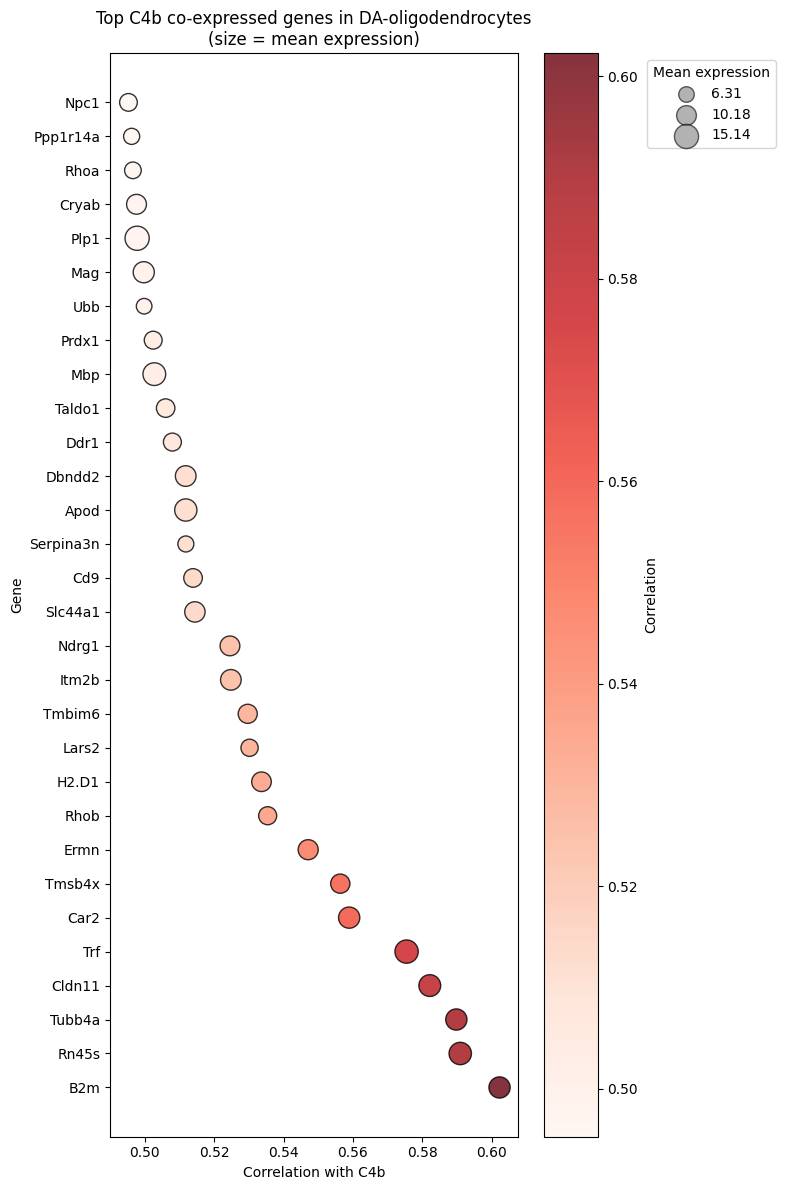

In [53]:

# usage
dotplot_corr_expr(top_genes, top_n=30)

# regression based

In [54]:
from sklearn.linear_model import LassoCV

X = da_oligos.to_df().drop(columns=["C4b"])
y = da_oligos.to_df()["C4b"]

lasso = LassoCV(cv=5).fit(X, y)
coefs = pd.Series(lasso.coef_, index=X.columns)
coefs = coefs[coefs != 0].sort_values(ascending=False)
print(coefs.head(20))

Unnamed: 0
Serpina3n    0.114931
B2m          0.083172
H2.K1        0.062679
Ppp1ca       0.052895
Igtp         0.046996
Tapbp        0.034703
Sema6d       0.034573
Paqr4        0.032910
Gsn          0.031228
Sort1        0.030446
Il33         0.025433
Wnk1         0.024757
Ctso         0.024378
Wasf2        0.024337
H2.D1        0.022940
Adora1       0.022142
Dmwd         0.020036
Clip3        0.019257
Apoe         0.018731
Rasa3        0.017950
dtype: float64


# Mutual information (nonlinear associations)

In [55]:
from sklearn.feature_selection import mutual_info_regression

X = da_oligos.to_df().drop(columns=["C4b"])
y = da_oligos.to_df()["C4b"]

mi = mutual_info_regression(X, y)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores.head(20))

Unnamed: 0
Rn45s        0.480672
App          0.414321
Mag          0.410917
Cldn11       0.409726
B2m          0.406472
Cnp          0.403379
Lars2        0.395208
Car2         0.387882
Itm2b        0.376576
Mbp          0.374187
Tuba1a       0.371992
Dbndd2       0.363079
Trf          0.359992
Gjb1         0.354083
Hnrnpa2b1    0.353674
Plp1         0.351631
Enpp2        0.347563
Tmsb4x       0.345678
Pllp         0.345286
Ndrg1        0.344672
dtype: float64


#  Cell-level co-expression probability

In [56]:
X = da_oligos.to_df()
c4b_pos = X["C4b"] > 0

coexpr_fraction = (X.loc[c4b_pos] > 0).mean()
coexpr_fraction = coexpr_fraction.sort_values(ascending=False).head(20)

In [57]:
coexpr_fraction

Unnamed: 0
Mag        1.0
Rnf13      1.0
Apod       1.0
H3f3b      1.0
Gstp1      1.0
Ddr1       1.0
Gpm6b      1.0
Scd2       1.0
Gpr37      1.0
Lars2      1.0
Mobp       1.0
Plekhb1    1.0
Cox6a1     1.0
Taldo1     1.0
Tspan2     1.0
App        1.0
Rhob       1.0
Myrf       1.0
Rtn3       1.0
Ywhaq      1.0
dtype: float64